## Part2: Training a neural network

## Imports

In [14]:
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
%run utils.ipynb import *

## Prepare the data

In [15]:
# load training data
train = read_data('train.csv')
# load testing data
test = read_data('test.csv')

In [16]:
# clean the data
X_train_scaled, y_train_encoded, X_test_scaled, y_train_unique_length = clean_data(train, test)

### Final training with the best Hyperparameters tuned

The best hyperparameters are:
1. the best learning rate to be used is **8e-2**
2. the best batch size to be used is **32**
3. the best hidden size to be used is **256**
4. the best optimizer to be used is **SGD**

In [17]:
BATCH_SIZE = 32
HIDDEN_SIZE = 256
LEARNING_RATE = 8e-2
OPTIMIZER = SGD(learning_rate=LEARNING_RATE)
DROPOUT_RATE = 0
DROPOUT = False


The Evaluation of the model on the train data is:
Train loss = 0.0256919227540493
Train accuracy = 0.991919219493866


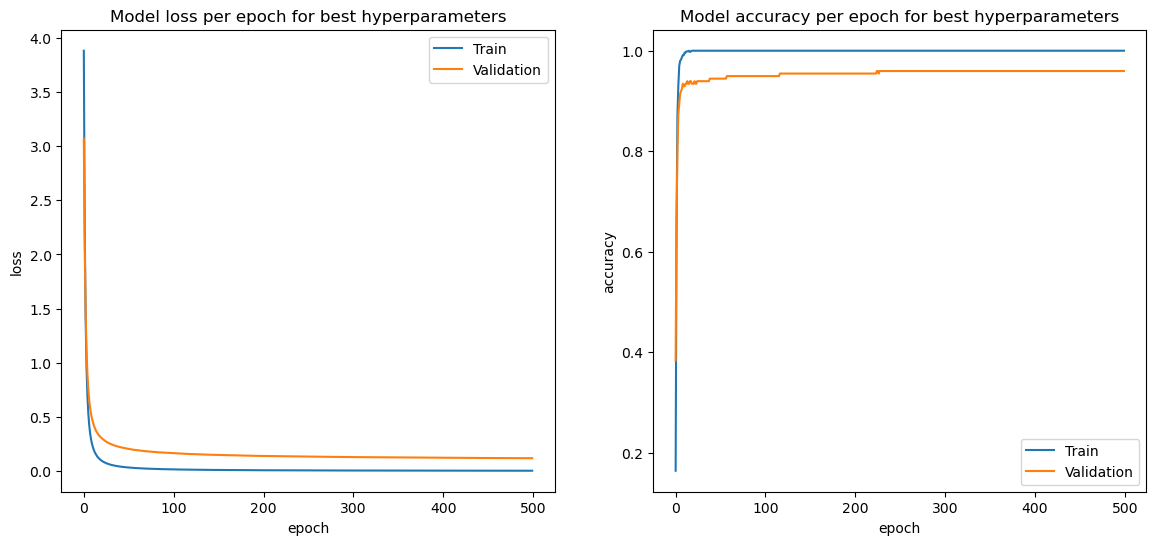

In [18]:
model = DenseMLP(input_shape= X_train_scaled.shape, hidden_size= HIDDEN_SIZE, output_size= y_train_unique_length, 
                     dropout_rate= DROPOUT_RATE, dropout= DROPOUT)
history = training(model, tf.cast(X_train_scaled,dtype=tf.float32), tf.cast(y_train_encoded,dtype=tf.int32), BATCH_SIZE, 
     OPTIMIZER, None,None)
train_curves(history,'for best hyperparameters',None)
loss, acc = evaluation(model= model, X= X_train_scaled, y= y_train_encoded, batch_size= BATCH_SIZE)
print('\nThe Evaluation of the model on the train data is:')
print('Train loss =',loss)
print('Train accuracy =', acc)

### Model Predictions

In [20]:
predictions = model.predict(X_test_scaled)
sample_submission = read_data('sample_submission.csv')
sb1 = sample_submission.drop(columns=['id'])
sb2 = sample_submission[['id']]
predictions_df = pd.DataFrame(predictions, index= sb1.index, columns= sb1.columns)
predictions_df = pd.concat([sb2,predictions_df],axis=1)
predictions_df.to_csv('Submission.csv',index=False)
predictions_df

19/19 [==============================] - 0s 1ms/step


,id,Acer_Capillipes,Acer_Circinatum,Acer_Mono,Acer_Opalus,Acer_Palmatum,Acer_Pictum,Acer_Platanoids,Acer_Rubrum,Acer_Rufinerve,...,Salix_Fragilis,Salix_Intergra,Sorbus_Aria,Tilia_Oliveri,Tilia_Platyphyllos,Tilia_Tomentosa,Ulmus_Bergmanniana,Viburnum_Tinus,Viburnum_x_Rhytidophylloides,Zelkova_Serrata
0,4,6.288408e-07,2.146109e-07,1.578248e-08,1.367425e-04,6.191627e-08,2.496251e-09,3.460858e-06,1.520186e-07,2.090919e-08,...,3.450283e-08,3.085651e-05,2.618595e-07,6.377786e-08,1.678141e-06,7.975490e-07,1.078720e-08,1.684198e-08,3.927481e-07,3.752646e-09
1,7,1.888617e-07,4.173831e-07,8.381441e-07,1.352618e-06,3.642863e-07,1.504994e-06,3.483535e-05,2.402977e-07,3.921728e-08,...,1.712723e-07,1.344253e-06,1.973783e-07,1.213570e-07,1.196863e-08,5.198320e-06,3.253632e-07,5.563358e-06,7.478177e-07,1.025337e-05
2,9,1.153923e-05,9.892588e-01,6.416626e-06,8.651783e-06,2.983206e-03,8.728180e-05,2.540224e-05,7.155516e-05,5.119492e-04,...,3.636580e-05,2.761795e-07,5.186160e-07,2.436717e-06,1.277333e-07,8.370319e-06,1.604601e-05,1.328485e-07,3.262562e-07,1.306645e-03
3,12,5.157186e-07,2.064326e-03,3.502989e-06,1.668159e-07,4.465121e-06,2.159887e-06,7.545714e-05,2.158087e-05,2.995477e-04,...,6.352107e-06,7.116829e-07,1.083094e-05,5.742518e-07,1.955364e-06,5.053393e-05,2.834718e-03,9.476656e-07,2.277051e-06,1.169933e-03
4,13,2.004886e-06,3.402193e-05,3.395484e-08,8.445635e-08,2.574118e-06,4.728064e-07,1.674855e-05,6.460807e-06,1.813173e-04,...,5.136264e-06,5.714170e-07,8.592551e-05,6.455882e-07,1.861635e-04,2.468376e-05,2.787068e-04,7.089024e-06,6.587248e-06,3.077241e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,1576,2.008975e-05,9.961682e-01,3.829063e-06,2.195091e-06,5.517525e-04,5.590819e-06,3.033021e-06,1.697178e-05,1.341895e-04,...,2.125130e-06,2.974231e-07,4.856283e-07,3.822599e-07,6.172234e-08,1.275801e-06,1.459549e-05,4.055763e-08,2.332845e-07,1.111415e-03
590,1577,1.845754e-06,3.085333e-06,7.251235e-08,2.647123e-05,1.043310e-07,1.350658e-08,1.821237e-07,6.140218e-05,1.838614e-04,...,1.758332e-06,7.024483e-07,1.880976e-05,1.665202e-07,1.373717e-04,9.508931e-04,2.985092e-05,9.400487e-09,4.659694e-07,1.067586e-05
591,1579,6.007861e-06,1.314381e-06,2.747680e-05,1.511493e-07,8.062832e-06,6.647965e-06,1.902018e-08,3.939974e-07,3.931592e-07,...,5.434895e-08,1.328467e-07,1.949894e-06,8.760120e-08,8.691119e-08,1.216767e-08,1.041853e-07,1.012105e-05,7.447948e-07,1.499882e-05
592,1580,4.341798e-07,5.507641e-06,1.400424e-05,1.703138e-06,7.025431e-05,4.351795e-06,2.458492e-06,1.950977e-04,2.283153e-06,...,2.573250e-05,4.358093e-05,2.843943e-08,9.784282e-05,1.900986e-06,8.515019e-07,1.560707e-06,3.624390e-06,6.878147e-08,1.071277e-06
